# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
from lakemodel_function import lake_problem

from ema_workbench import Model, RealParameter, TimeSeriesOutcome, ScalarOutcome, Policy, ema_logging

if __name__ == "__main__":
    ema_logging.log_to_stderr(level=ema_logging.INFO)

    model = Model('lakemodel', function=lake_problem)
    
    model.levers = [RealParameter(f"l{i}",0,0.1) for i in range(100)]
    
    model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('delta', 0.93, 0.99),
                      ]
    
    model.outcomes = [ScalarOutcome('max_P'),
                      ScalarOutcome('utility'),
                      ScalarOutcome('inertia'),
                      ScalarOutcome('reliability'),
                  ]

C:\Users\Stervende Zwaan\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\Stervende Zwaan\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, perform_experiments) 

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [3]:
cleaned = experiments.drop(columns=[l.name for l in model.levers])

In [4]:
from ema_workbench.analysis import prim ,dimensional_stacking
import matplotlib.pyplot as plt

x = cleaned

#This is what we decided to do at first
#y = outcomes['reliability'] > 0.9

#But Bramka is suggesting the following
y = outcomes['reliability'] < np.percentile(outcomes['reliability'], 10)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

C:\Users\Stervende Zwaan\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 3304 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1314, coverage: 0.3976997578692494, density: 1.0 restricted_dimensions: 3


<Figure size 640x480 with 2 Axes>

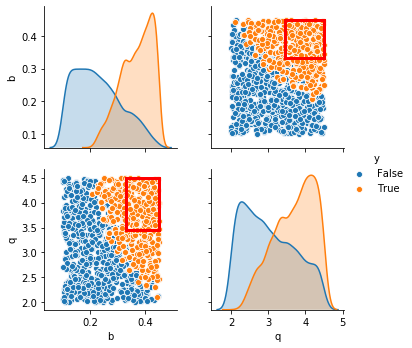

In [5]:
box1.select(18)
fig = box1.show_pairs_scatter()
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


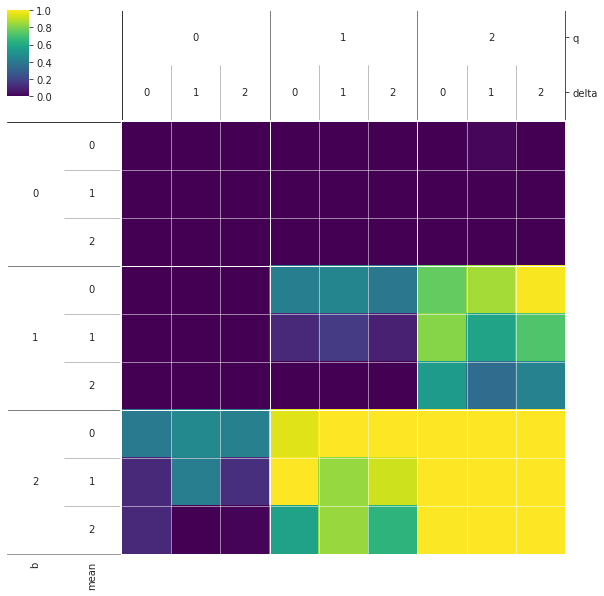

In [6]:
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()